<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/predictions_with_lstm_DIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np

data=np.load(path+'datadial.npy')
target=np.load(path+'targetdial.npy')

In [15]:
data.shape
target.shape

(2371,)

In [16]:
train_data=data[:1659]
train_target=target[:1659]

test_data=data[1659:]
test_target=target[1659:]

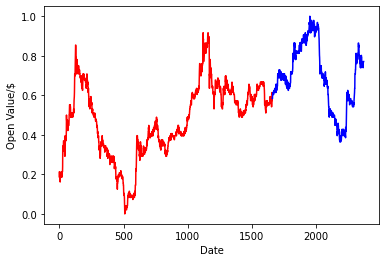

In [17]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1659,2371,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [18]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

In [19]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
47/47 [==============================] - 7s 44ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1230 - mape: 277569.6594 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0219 - val_mape: 3.7916
Epoch 2/200
47/47 [==============================] - 1s 16ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0478 - mape: 88036.3112 - val_loss: 9.7212e-04 - val_mse: 9.7212e-04 - val_mae: 0.0201 - val_mape: 3.4688
Epoch 3/200
47/47 [==============================] - 1s 15ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0484 - mape: 47485.0798 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0662 - val_mape: 11.2493
Epoch 4/200
47/47 [==============================] - 1s 15ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0505 - mape: 28655.1785 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0277 - val_mape: 4.6255
Epoch 5/200
47/47 [==============================] - 1s 15ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0459 - mape: 18133.0019 - val_loss: 7.7219e-04 - val_mse: 7.7219e-04 - val_mae

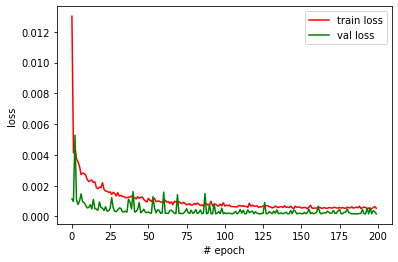

In [20]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)
print(result.shape)
print(test_target.shape)

r2 score: 0.9822662790935593
(712, 1)
(712,)


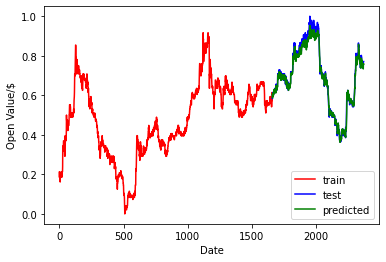

In [22]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1659,2371,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

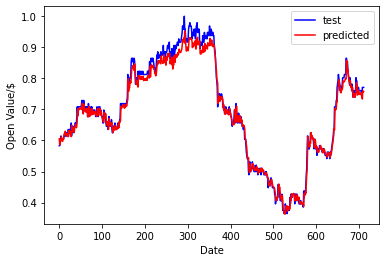

In [23]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [24]:
model.save_weights("JHK Stock Model new.h5")